# Week 14 - Astropy

## Today's Agenda

- Useful functions of [Astropy](http://www.astropy.org/)
- Units
- Time
- Coordinates
- FITS files
- Analytic functions
- AstroPy Tables and different formats

[Astropy](http://www.astropy.org/) is a package that is meant to provide a lot of basic functionality for astronomy work in Python

This can be roughly broken up into two areas. One is astronomical calculations:  
* unit and physical quantity conversions
* physical constants specific to astronomy
* celestial coordinate and time transformations

The other is file type and structures:
* FITS files, implementing the former standalone PyFITS interface
* Virtual Observatory (VO) tables
* common ASCII table formats, e.g. for online catalogues or data supplements of scientific publications
* Hierarchical Data Format (HDF5) files

`AstroPy` normallly comes with the Anaconda installation. But in case you happen to not have it installed it on your computer, you can simply do a 
```sh
    pip install --no-deps astropy
```

You can always update it via 
```sh
    conda update astropy
```
This is just a __glimpse__ of all the features that `AstroPy` has:

<img src="./images/astropy_sections.png" alt="Astropy Features" width="600">




For purposes of today, we'll focus just on what astropy can do for units, time, coordinates, image manipulation, and more.

In [205]:
# Importing Modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [206]:
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import constants as const

## Units

Astropy.units introduces units and allows for unit conversions. It doesn't, however, correctly handle spherical coordinates, but the astropy.coordinates package will address this later.

These units can be used to create objects that are made up of both a value and a unit, and basic math can be easily carried out with these. We can add the .unit and .value properties to get the units and numerical values, respectively.

In [207]:
d=42*u.meter
t=6*u.second
v=d/t
print v
print v.unit

7.0 m / s
m / s


Astropy includes a large number of units, and this can include imperial units as well if desired by importing and enabling imperial units. The .find_equivalent_units() function will also return all the other units that are already defined in astropy. Below we do a quick list of the units that are defined for time and length units

In [208]:
from astropy.units import imperial
imperial.enable()
print( u.s.find_equivalent_units() )
print( u.m.find_equivalent_units() )

  Primary name | Unit definition | Aliases 
[
  a            | 3.15576e+07 s   | annum    ,
  d            | 86400 s         | day      ,
  fortnight    | 1.2096e+06 s    |          ,
  h            | 3600 s          | hour, hr ,
  min          | 60 s            | minute   ,
  s            | irreducible     | second   ,
  sday         | 86164.1 s       |          ,
  wk           | 604800 s        | week     ,
  yr           | 3.15576e+07 s   | year     ,
]
  Primary name | Unit definition | Aliases                         
[
  AU           | 1.49598e+11 m   | au, astronomical_unit            ,
  Angstrom     | 1e-10 m         | AA, angstrom                     ,
  cm           | 0.01 m          | centimeter                       ,
  earthRad     | 6.37814e+06 m   | R_earth, Rearth                  ,
  ft           | 0.3048 m        | foot                             ,
  fur          | 201.168 m       | furlong                          ,
  inch         | 0.0254 m        |              

The package also provides constants, with the units included. The full list of units can be found [here](http://docs.astropy.org/en/stable/constants/). We can take a quick look at c and G below, and see that these are objects which have value, uncertainty, and units.

In [209]:
print const.c
print const.G

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010
  Name   = Gravitational constant
  Value  = 6.67384e-11
  Uncertainty  = 8e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2010


Astropy has an aditional function that will allow for unit conversions. So we can, for example, create an object that is the distance to Mars, and then convert that to kilometers or miles. A brief note is that if you try to convert a pure unit (like the 4th line below) into another unit, you'll get a unitless value representing the conversion between the two.

This can also be used to convert constants into other units, so we can convert the speed of light to the somewhat useful pc/yr or the entirely unuseful furlong/fortnight

In [210]:
Mars=1.5*u.AU
print Mars.to('kilometer')
print Mars.to('mile')
print u.AU.to('kilometer')
print const.c.to('pc/yr')
print const.c.to('fur/fortnight')

224396806.05 km
139433710.91 mi
149597870.7
0.306601393788 pc / yr
1.80261749979e+12 fur / fortnight


To use this more practically, we can calculate the time it will take for light to reach the earth just by dividing 1 AU by the speed of light, as done below. Since AU is a unit, and c is in m/s, we end up with an answer that is (AU\*m/s). By using .decompose() we can simplify that expression, which in this case will end up with an answer that is just in seconds. Finally, we can then convert that answer to minutes to get the answer of about 8 1/3 minutes that is commonly used. None of this required our doing the conversions where we might've slipped up.

In [211]:
time=1*u.AU/const.c
print(time)

time_s=time.decompose()
print(time_s)

time_min=time_s.to(u.minute)
print(time_min)

3.33564095198e-09 AU s / m
499.004783836 s
8.31674639727 min


## Time

Astropy handles time in a similar way to units, with creating Time objects. These objects have two main properties.  
The format is simply how the time is displayed. This is the difference between, for example, Julian Date, Modified Julian Date, and ISO time (YYYY-MM-DD HH:MM:SS). The second is the scale, and is the difference between terrestrial time vs time at the barycenter of the solar system.

We can start off by changing a time from one format to many others. We can also subtract times and we will get a timedelta unit.

In [212]:
from astropy.time import Time
t=Time(57867.346424, format='mjd', scale='utc')
t1=Time(58867.346424, format='mjd', scale='utc')
print t.mjd
print t.iso
print t.jyear
t1-t

57867.346424
2017-04-24 08:18:51.034
2017.31101006


<TimeDelta object: scale='tai' format='jd' value=1000.0>

## Coordinates

Coordinates again work by using an object time defined for this purpose. We can establish a point in the ICRS frame (this is approximately the equatorial coordinate) by defining the ra and dec. Note that here we are using u.degree in specifying the coordinates.

We can then print out the RA and dec, as well as change the units displayed. In the last line, we can also convert from ICRS equatorial coordinates to galactic coordinates.

In [213]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
print c
print c.ra
print c.dec
print c.ra.hour
print c.ra.hms
print c.galactic

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.68458,  41.26917)>
10d41m04.488s
41d16m09.012s
0.712305333333
hms_tuple(h=0.0, m=42.0, s=44.299200000000525)
<SkyCoord (Galactic): (l, b) in deg
    ( 121.17424181, -21.57288557)>


## Slightly practical application of this

Using some of these astropy functions, we can do some fancier applications. Starting off, we import a listing of stars with RA and dec from the attached table, and store them in the coordinate formats that are used by astropy. We then use matplotlib to plot this, and are able to easily convert them into radians thanks to astropy. This plot is accurate, but it lacks reference for where these points are.

['rowid' 'pl_hostname' 'pl_letter' 'pl_discmethod' 'pl_pnum' 'ra_str' 'ra'
 'dec_str' 'dec' 'st_rah']


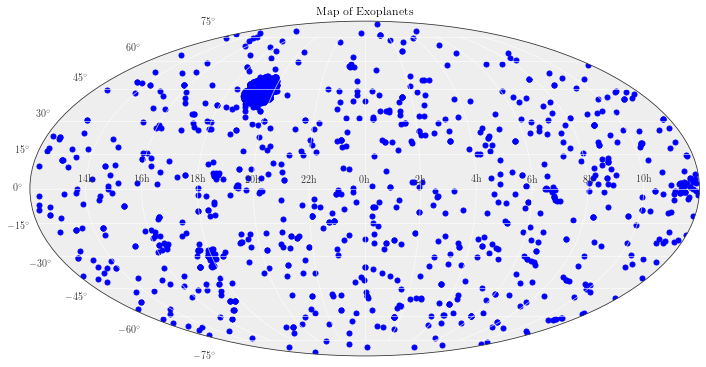

In [214]:
hosts={}
data=np.loadtxt('./data/planets.tab', dtype='str', delimiter='\t')
print data[0]
hosts['ra_hours']=data[1:,9].astype(float)
hosts['ra']=data[1:,6].astype(float)
hosts['dec']=data[1:,8].astype(float)
#print hosts['ra_hours']
#print hosts['dec']

import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
ra = coord.Angle(hosts['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(hosts['dec']*u.degree)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
plt.title('Map of Exoplanets')
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.show()

To fix this, we will add some references to this by adding a few more sets of data points. The first is relatively simple, we put in a line at the celestial equator. This just has to be a set of points that are all at declination of 0, and from -180 to +180 degrees in RA. These are a and b in the below.

We also want to add the planes of the ecliptic and the galaxy on this. For both, we use coordinate objects and provide numpy arrays where one coordinate is at zero, and the other goes from 0 to 360. With astropy we can then easily convert from each coordinate system to ICRS. There's some for loops to modify the plotting, but the important thing is that this will give us a plot that has not just the locations of all the planets that we've plotted, but will also include the celestial equator, galactic plane, and ecliptic plane on it.

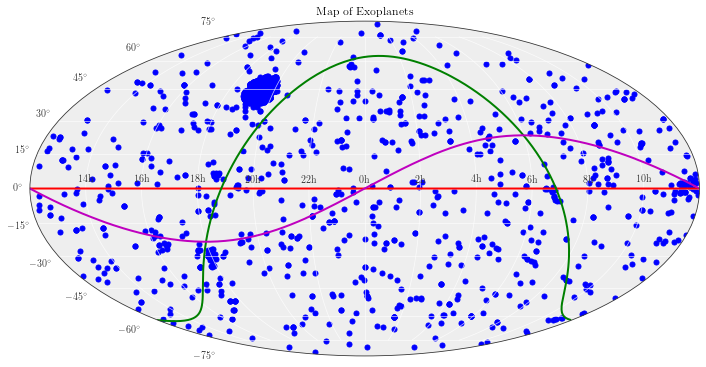

In [215]:
a=coord.Angle((np.arange(361)-180)*u.degree)
b=coord.Angle(np.zeros(len(a))*u.degree)
numpoints=360
galaxy=SkyCoord(l=coord.Angle((np.arange(numpoints))*u.degree), b=coord.Angle(np.zeros(numpoints)*u.degree), frame='galactic')
ecliptic=SkyCoord(lon=coord.Angle((np.arange(numpoints))*u.degree), lat=coord.Angle(np.zeros(numpoints)*u.degree), frame='geocentrictrueecliptic')
ecl_eq=ecliptic.icrs
gal_eq=galaxy.icrs
#print gal_eq
fixed_ra=[]
for item in gal_eq.ra.radian:
   if item < np.pi:
      fixed_ra.append(item)
   else:
      fixed_ra.append(item-2*np.pi)
i=np.argmin(fixed_ra)
fixed_dec=[x for x in gal_eq.dec.radian]

fixed_ra_eq=[]
for item in ecl_eq.ra.radian:
   if item < np.pi:
      fixed_ra_eq.append(item)
   else:
      fixed_ra_eq.append(item-2*np.pi)
j=np.argmin(fixed_ra_eq)
fixed_dec_eq=[x for x in ecl_eq.dec.radian]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
plt.title('Map of Exoplanets')
ax.scatter(ra.radian, dec.radian)
ax.plot(a.radian, b.radian, color='r', lw=2)
#ax.scatter(gal_eq.ra.radian, gal_eq.dec.radian, color='g')
ax.plot(fixed_ra[i:]+fixed_ra[:i], fixed_dec[i:]+fixed_dec[:i], color='g', lw=2)
ax.plot(fixed_ra_eq[j:]+fixed_ra_eq[:j], fixed_dec_eq[j:]+fixed_dec_eq[:j], color='m', lw=2)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.show()

# Reading in FITS files

One of the useful things with `Astropy` is that you can use it for reading in FITS files, and extracting info such as bands, exposure times, intrument information, etc.

In this example, we will read in a FITS image file, and extract its information

In [216]:
# We will use  `wget` to download the necessary file to the `data` folder.
!wget 'http://star.herts.ac.uk/~gb/python/656nmos.fits' -O ./data/hst_image.fits

--2017-04-24 09:29:04--  http://star.herts.ac.uk/~gb/python/656nmos.fits
Resolving star.herts.ac.uk... 147.197.221.254
Connecting to star.herts.ac.uk|147.197.221.254|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10298880 (9.8M) [image/fits]
Saving to: `./data/hst_image.fits'

100%[======================================>] 10,298,880  5.00M/s   in 2.0s    

2017-04-24 09:29:06 (5.00 MB/s) - `./data/hst_image.fits' saved [10298880/10298880]



Now we can extract some of the information stored in the FITS file.

In [217]:
from astropy.io import fits
filename = './data/hst_image.fits'
hdulist = fits.open(filename)

The returned object, hdulist, (an instance of the [HDUList](http://docs.astropy.org/en/stable/io/fits/api/hdulists.html#hdulist) class) behaves like a Python list, and each element maps to a Header-Data Unit (HDU) in the FITS file. You can view more information about the FITS file with:

In [218]:
hdulist.info()

Filename: ./data/hst_image.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     290   (1600, 1600)   float32   
  1  656nmos_cvt.tab  TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


As we can see, this file contains two HDUs. The first contains the image, the second a data table. To access the primary HDU, which contains the main data, you can then do:

In [219]:
hdu = hdulist[0]

To read the header of the FITS file, you can read __`hdulist`__. The following shows the different keys for the header

In [220]:
np.sort(hdulist[0].header.keys())

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', 'ALLG-MAX', 'ALLG-MIN', 'ASTR_I',
       'ATODCORR', 'ATODFILE', 'ATODGAIN', 'ATODSAT', 'BACKGRND',
       'BADPIXEL', 'BIASCORR', 'BIASDFIL', 'BIASEVEN', 'BIASFILE',
       'BIASODD', 'BITPIX', 'BLEVCORR', 'BLEVDFIL', 'BLEVFILE', 'BSCALE',
       'BZERO', 'CALIBDEF', 'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'CDBSFILE',
       'COMPTAB', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CTYPE1',
       'CTYPE2', 'DADSCLAS', 'DADSDATE', 'DADSFILE', 'DARKCORR',
       'DARKDFIL', 'DARKFILE', 'DARKTIME', 'DATALOST', 'DATAMAX',
       'DATAMEAN', 'DATAMIN', 'DATE', 'DATE-OBS', 'DEC_SUN', 'DEC_TARG',
       'DETECTOR', 'DEZERO', 'DOHISTOS', 'DOPHOTOM', 'DOSATMAP',
       'EPLONGPM', 'EQNX_SUN', 'EQRADTRG', 'EQUINOX', 'ERRCNT', 'EXPEND',
       'EXPFLAG', 'EXPSTART', 'EXPTIME', 'EXTEND', 'FGSLOCK', 'FILENAME',
       'FILET

As we can see, this file contains two HDUs. The first contains the image, the second a data table.

Let's look at the image of the FITS file.
The hdu object then has two important attributes: data, which behaves like a Numpy array, can be used to access the data, and header, which behaves like a dictionary, can be used to access the header information. First, we can take a look at the data:

In [221]:
hdu.data.shape

(1600, 1600)

This tells us that it is a 1600-by-1600 pixel image. We can now take a peak at the header. To access the primary HDU, which contains the main data, you can then do:

In [222]:
hdu.header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 1600 /                                                
NAXIS2  =                 1600 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                 2112 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2005-07-01'         / Date FITS file was created                     
FILENAME= '656nmos_cvt.hhh'    / Original filename                              
ALLG-MAX=           0.000000

We can access individual header keywords using standard item notation:

In [223]:
hdu.header['INSTRUME']

'WFPC2'

In [224]:
hdu.header['EXPTIME']

1100.0

We can plot the image using matplotlib:

/Users/victor2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


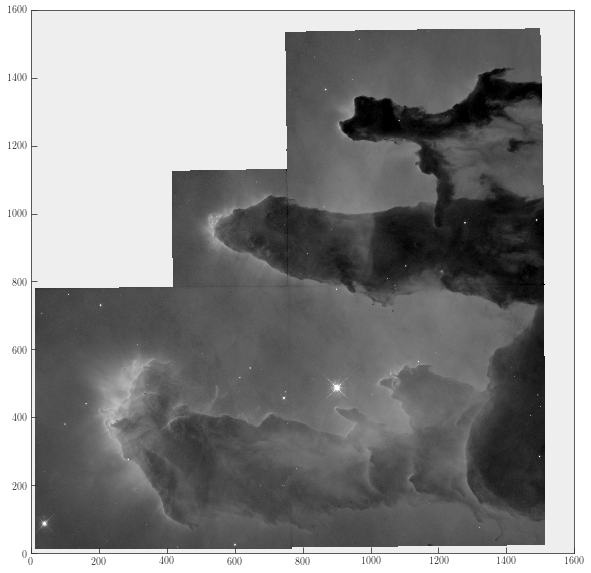

In [225]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(hdu.data), origin='lower', cmap='gray', vmin=1.5, vmax=3)

You can also add new fields to the FITS file

In [226]:
hdu.header['MODIFIED'] = '2014-12-01'  # adds a new keyword

and we can also change the data, for example subtracting a background value:

In [227]:
hdu.data = hdu.data - 0.5

This only changes the FITS file in memory. You can write to a file with:

In [228]:
hdu.writeto('./data/hubble-image-background-subtracted.fits', overwrite=True)

In [229]:
!ls ./data

README.md                               astropy_data_latex.tex
astropy_data.tb                         hst_image.fits
astropy_data_2.tb                       hubble-image-background-subtracted.fits
astropy_data_csv.csv                    planets.tab
astropy_data_ecsv.ecsv                  sources.dat


# Analytic Functions

`Astropy` comes with some built-in analytic functions, e.g. the _`blackbody radiation`_ function.

## Blackbody Radiation
Blackbody flux is calculated with Planck law ([Rybicki & Lightman 1979](http://docs.astropy.org/en/stable/analytic_functions/index.html#ref-rybicki1979))

$$B_{\lambda}(T) = \frac{2 h c^{2} / \lambda^{5}}{exp(h c / \lambda k T) - 1}$$
$$B_{\nu}(T) = \frac{2 h \nu^{3} / c^{2}}{exp(h \nu / k T) - 1}$$

In [230]:
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

In [231]:
def Planck_func(temp, lam_arr, opt='lam'):
    """
    Computes the Blackbody radiation curve of a blackbody of a given temperature `temp`.
    
    Parameters
    ----------
    temp: float or array-like
        temperature(s) of the blackbody
    
    lam_arr: float or array_like
        aray of wavelenths to evaluate the Planck function.
    
    opt: str, optional (default = 'lam')
        Option for returning either the flux of `lambda` (wavelength) or `nu` (frequency).
        Options:
            - `lam`: Return flux for `lambda' or wavelength
            - `nu` : Returns flux for `nu` (frequency)
    """
    wavelengths = lam_arr * u.AA
    temperature = temp * u.K
    with np.errstate(all='ignore'):
        flux_lam = blackbody_lambda(wavelengths, temperature)
        flux_nu  = blackbody_nu(wavelengths, temperature)
    
    if opt=='lam':
        return flux_lam
    if opt=='nu':
        return flux_nu

Let's plot the Planck function for two bodies with temperatures $T_1 = 8000\ K$ and $T_2 = 6000\ K$

In [232]:
lam_arr = np.arange(1e2, 2e4)
nu_arr  = (const.c/(lam_arr * u.AA)).to(1./u.s).value

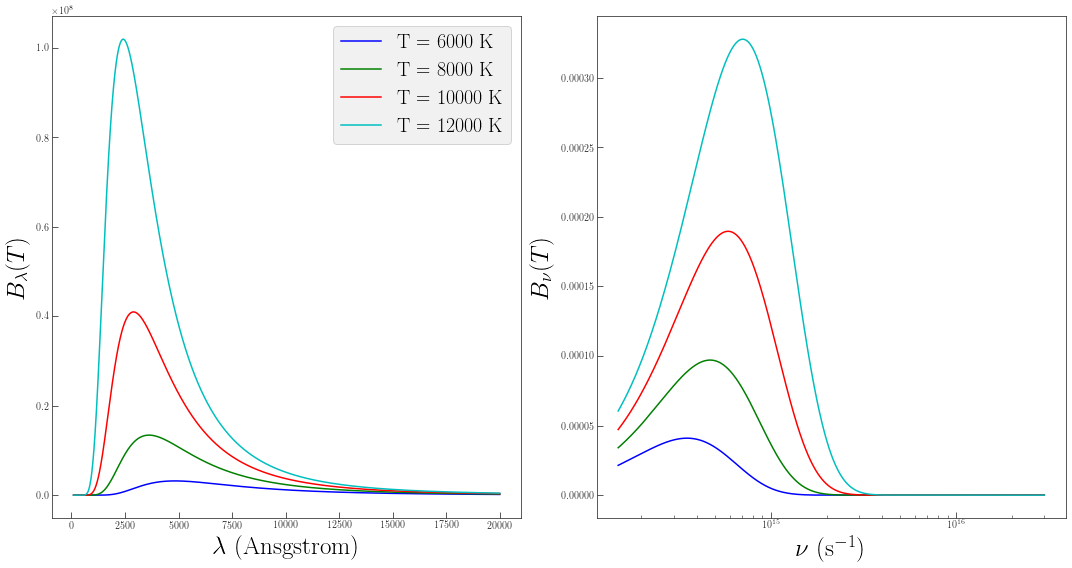

In [233]:
fig = plt.figure(figsize=(15,8))
ax1  = fig.add_subplot(121, axisbg='white')
ax2  = fig.add_subplot(122, axisbg='white')
ax1.set_xlabel(r'$\lambda$ (Ansgstrom)', fontsize=25)
ax1.set_ylabel(r'$B_{\lambda}(T)$', fontsize=25)
ax2.set_xlabel(r'$\nu$ (\textrm{s}^{-1})', fontsize=25)
ax2.set_ylabel(r'$B_{\nu}(T)$', fontsize=25)
ax2.set_xscale('log')

temp_arr = [6e3, 8e3, 1e4, 1.2e4]
for temp in temp_arr:
    ax1.plot(lam_arr, Planck_func(temp, lam_arr=lam_arr, opt='lam'), label='T = {0} K'.format(int(temp)))
    ax2.plot(nu_arr , Planck_func(temp, lam_arr=lam_arr, opt='nu' ), label='T = {0} K'.format(int(temp)))
    ax1.legend(loc=1, prop={'size':20})
plt.tight_layout()

# AstroPy Tables

## Read files
You can use `Astropy` to __read__ tables from data files. We'll use it to read the `sources.dat` file, which contains columns and rows of data

In [234]:
!head ./data/sources.dat

obsid redshift  X      Y     object
3102  0.32      4167  4085   Q1250+568-A
877   0.22      4378  3892   "Source 82"



In [235]:
from astropy.io import ascii
sources_tb = ascii.read('./data/sources.dat')

print( sources_tb )

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


## Write to files

You can also write directoy to a file using the data in the `AstroPy` table.
Let's create a new `AstroPy` Table:

In [236]:
from astropy.table import Table, Column, MaskedColumn
x = np.random.uniform(low=10, high=20, size=(1000,))
y = np.random.uniform(low=100, high=50, size=(x.size,))
z = np.random.uniform(low=30, high=50, size=(x.size,))
data = Table([x, y], names=['x', 'y'])
print(data)

      x             y      
------------- -------------
19.5706422032 93.1410956122
 19.073512599 85.9131399585
16.3430833999  98.779104932
16.9635323692 53.6609382758
15.6217437613 85.3526745166
14.4245738821 99.6432741257
14.1897149826 88.8060690267
17.2327192585 64.3941861768
18.5688787233 78.1913903263
16.1786605184 54.1475963252
          ...           ...
11.7547276032 93.5894396399
 11.449042999 86.0191860858
 14.320778641 68.5379453805
12.6231479056 67.9845233059
10.4229658674 59.6636048747
18.5242413953 74.3612525789
 18.270670536 73.0108280083
13.0453454217 59.4497958377
19.5877852755 57.6853956551
 17.906704912 96.7514722538
17.7244955571 53.4064008095
Length = 1000 rows


In [237]:
ascii.write(data, './data/astropy_data.tb')

Let's see what's in the `astropy_data.tb` file

In [238]:
!head ./data/astropy_data.tb

x y
19.57064220320345 93.14109561222229
19.07351259904612 85.91313995850308
16.34308339990654 98.77910493204153
16.963532369184737 53.66093827584521
15.621743761323728 85.35267451664782
14.424573882057487 99.64327412574883
14.189714982595598 88.80606902669402
17.232719258549572 64.39418617675867
18.568878723316693 78.1913903262776


You can also specify the _delimiter_ of the file. For example, we can separate it with a _comma_.

In [239]:
ascii.write(data, './data/astropy_data_2.tb', delimiter=',')

In [240]:
!head ./data/astropy_data_2.tb

x,y
19.57064220320345,93.14109561222229
19.07351259904612,85.91313995850308
16.34308339990654,98.77910493204153
16.963532369184737,53.66093827584521
15.621743761323728,85.35267451664782
14.424573882057487,99.64327412574883
14.189714982595598,88.80606902669402
17.232719258549572,64.39418617675867
18.568878723316693,78.1913903262776


## AstroPy Tables to other Formats

The `AstroPy` tables can also be converted to multiple formats

### to Pandas DataFrames

A nice feature of `AstroPy` Tables is that you can export your data into different formats. 
For example, you can export it as a ```Pandas``` Dataframe. 

See here for more info on how to use pandas with Astropy: [http://docs.astropy.org/en/stable/table/pandas.html](http://docs.astropy.org/en/stable/table/pandas.html)

In [241]:
df = data.to_pandas()
df.head()

,x,y
0,19.570642,93.141096
1,19.073513,85.913140
2,16.343083,98.779105
3,16.963532,53.660938
4,15.621744,85.352675


And to compare, let's see the `AstroPy` Tables format

In [242]:
data

x,y
float64,float64
19.5706422032,93.1410956122
19.073512599,85.9131399585
16.3430833999,98.779104932
16.9635323692,53.6609382758
15.6217437613,85.3526745166
14.4245738821,99.6432741257
14.1897149826,88.8060690267
17.2327192585,64.3941861768
18.5688787233,78.1913903263


### to LaTeX tables

A nice thing about `AstroPy` is that you can convert your data into LaTeX tables. This is easily done with writing it to a file. You can then copy it and use it on your next publication

In [243]:
import sys
ascii.write(data[0:10], sys.stdout, format='latex')

\begin{table}
\begin{tabular}{cc}
x & y \\
19.5706422032 & 93.1410956122 \\
19.073512599 & 85.9131399585 \\
16.3430833999 & 98.779104932 \\
16.9635323692 & 53.6609382758 \\
15.6217437613 & 85.3526745166 \\
14.4245738821 & 99.6432741257 \\
14.1897149826 & 88.8060690267 \\
17.2327192585 & 64.3941861768 \\
18.5688787233 & 78.1913903263 \\
16.1786605184 & 54.1475963252 \\
\end{tabular}
\end{table}


To save it as a file, you can do this:

In [244]:
ascii.write(data, './data/astropy_data_latex.tex', format='latex')

In [245]:
# I'm only showing the first 10 lines
!head ./data/astropy_data_latex.tex

\begin{table}
\begin{tabular}{cc}
x & y \\
19.5706422032 & 93.1410956122 \\
19.073512599 & 85.9131399585 \\
16.3430833999 & 98.779104932 \\
16.9635323692 & 53.6609382758 \\
15.6217437613 & 85.3526745166 \\
14.4245738821 & 99.6432741257 \\
14.1897149826 & 88.8060690267 \\


### to CSV files

In [246]:
ascii.write(data, './data/astropy_data_csv.csv', format='csv', fast_writer=False) 

In [247]:
!head ./data/astropy_data_csv.csv

x,y
19.5706422032,93.1410956122
19.073512599,85.9131399585
16.3430833999,98.779104932
16.9635323692,53.6609382758
15.6217437613,85.3526745166
14.4245738821,99.6432741257
14.1897149826,88.8060690267
17.2327192585,64.3941861768
18.5688787233,78.1913903263


### Other formats

`AstroPy` tables come with a great support for many different types of files.
This is a list of the supported files that you can import/export AstroPy tables.

![astropy_formats](./images/astropy_table_formats.png)

### Data tables and Column types

You can also use `AstroPy` tables to preserve the metadata of a column. For example, you can keep the units of each column, so that you use the data later on, and still be able to use unit conversions, etc. for this.

In [248]:
t = Table(masked=True)
t['x'] = MaskedColumn([1.0, 2.0], unit='m', dtype='float32')
t['x'][1] = np.ma.masked
t['y'] = MaskedColumn([False, True], dtype='bool')

In [249]:
t

x,y
m,
float32,bool
1.0,False
--,True


Now we can save it into a `ecsv` file. This type of file will preserve the type of units, and more, for each of the columns

In [250]:
from astropy.extern.six.moves import StringIO
fh = StringIO()
t.write(fh, format='ascii.ecsv')  
table_string = fh.getvalue()      
print(table_string) 

# %ECSV 0.9
# ---
# datatype:
# - {name: x, unit: m, datatype: float32}
# - {name: y, datatype: bool}
x y
1.0 False
"" True



In [251]:
Table.read(table_string, format='ascii')  

x,y
m,
float32,bool
1.0,False
--,True


Or you can dump it into a file

In [252]:
t.write('./data/astropy_data_ecsv.ecsv', format='ascii.ecsv')

And you can now read it in

In [253]:
data_ecsv = ascii.read('./data/astropy_data_ecsv.ecsv', format='ecsv')
data_ecsv

x,y
m,
float32,bool
1.0,False
--,True


In [255]:
data_ecsv['x']

1.0
--


# Resources

For further reading and exercises, you can check out:
- Astropy Documents: [http://docs.astropy.org/en/stable/index.html](http://docs.astropy.org/en/stable/index.html)
- Programming and Statistics - Python Notes (Notes from a class at the University of Hertfordshire) [https://star.herts.ac.uk/~gb/python/](https://star.herts.ac.uk/~gb/python/)
- HST FITS files for fun: [https://www.spacetelescope.org/projects/fits_liberator/m17data/](https://www.spacetelescope.org/projects/fits_liberator/m17data/)
- AstroPy on _Aperture Photometry_: [http://photutils.readthedocs.io/en/stable/photutils/aperture.html](http://photutils.readthedocs.io/en/stable/photutils/aperture.html)
- AstroPy Tutorials [http://www.astropy.org/astropy-tutorials/](http://www.astropy.org/astropy-tutorials/)
- Photutils - AstroPy package for doing Photometry [http://photutils.readthedocs.io/en/stable/index.html](http://photutils.readthedocs.io/en/stable/index.html)